<a href="https://colab.research.google.com/github/wallaceleonardo/bootcamp-IGTI-Desenvolvedor_Python/blob/main/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np

##**Numpy**

In [2]:
# array
x = np.array([[1, 3, 7],
             [4, 11, 21],
              [42, 8, 9]])
print("x:\n", x)

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]


In [3]:
# reshape: transformar a matriz em um vetor coluna
# (3, 3) vira (9, 1): 3*3 = 9*1 = 9
print("transformação de em um vetor coluna: \n", x.reshape(9, 1))

transformação de em um vetor coluna: 
 [[ 1]
 [ 3]
 [ 7]
 [ 4]
 [11]
 [21]
 [42]
 [ 8]
 [ 9]]


In [4]:
# transposição de matriz
print("x transposta: \n", x.T)

x transposta: 
 [[ 1  4 42]
 [ 3 11  8]
 [ 7 21  9]]


In [5]:
# np.sum: soma em um dado eixo, axis = {0: linha, 1: coluna}
print("x:\n", x)
print("soma de todos os elementos de x:", np.sum(x))
print("soma de x ao longo das linhas:", np.sum(x, axis=0))
print("soma de x ao longo das colunas:", np.sum(x, axis=1))

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
soma de todos os elementos de x: 106
soma de x ao longo das linhas: [47 22 37]
soma de x ao longo das colunas: [11 36 59]


In [6]:
# np.mean: média em um dado eixo, axis = {0: linha, 1: coluna}
print("x:\n", x)
print("média de todos os elementos de x:", np.mean(x))
print("média de x ao longo das linhas:", np.mean(x, axis=0))
print("média de x ao longo das colunas:", np.mean(x, axis=1))

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
média de todos os elementos de x: 11.777777777777779
média de x ao longo das linhas: [15.66666667  7.33333333 12.33333333]
média de x ao longo das colunas: [ 3.66666667 12.         19.66666667]


In [7]:
# np.where, identificação dos índices onde uma data condição
# é atendida. Uso conjunto com indexação booleana
cond = x % 2 == 0 # números pares
print("condição: \n", cond)
i, j = np.where(cond) # índices x[i, j] = x[cond]
print("índice i (linhas):", i)
print("índice j (linhas):", j)

condição: 
 [[False False False]
 [ True False False]
 [ True  True False]]
índice i (linhas): [1 2 2]
índice j (linhas): [0 0 1]


In [8]:
# indexação booleana e slicing: selecionar as linhas
# de x que possuem algum número par
print("x:\n", x)
cond = x % 2 == 0 # números pares
print("condição: \n", cond)

# se houver alguma condição True na linha, a soma será > 0
i_row = np.where(np.sum(cond, axis=1))[0]
print("índice das linhas que possuem números pares:", i_row)
print("linhas que possuem números pares: \n", x[i_row, :])


x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
condição: 
 [[False False False]
 [ True False False]
 [ True  True False]]
índice das linhas que possuem números pares: [1 2]
linhas que possuem números pares: 
 [[ 4 11 21]
 [42  8  9]]


**Regressão linear no Numpy**

In [9]:
# imports
import matplotlib.pyplot as plt

In [10]:
# dataset
x = [1., -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.]
y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

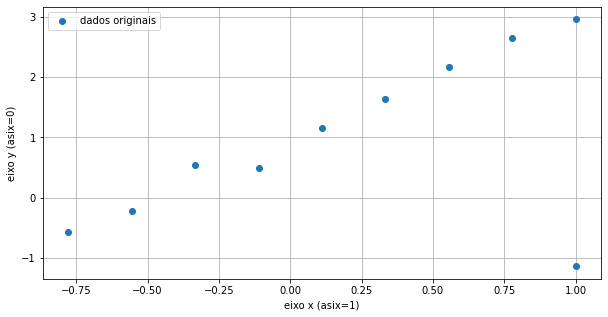

In [12]:
# plot do dataset
plt.figure(figsize=(10, 5))
# plt.plot(x, y, label='dados originais')
plt.plot(x, y, 'o', label='dados originais')
plt.legend()
plt.xlabel("eixo x (asix=1)")
plt.ylabel("eixo y (asix=0)")
plt.grid()
plt.show()

In [14]:
"""
Iremos estimar uma função do tipo: y = a*x + b
ou seja, devemos achar quais os valores de a e b
que melhor representa os dados.

Os valores reais de a e b são: (a, b): 2, 1
"""
# transformando para numpy e vetor coluna
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

# adicionando bias: para estimar o termo b
X = np.hstack((x, np.ones(x.shape)))

# estimando a e b
beta = np.linalg.pinv(X).dot(y)
print("a estimado:", beta[0][0])
print("b estimado:", beta[1][0])

a estimado: 1.1305310275382185
b estimado: 0.7418830564923564


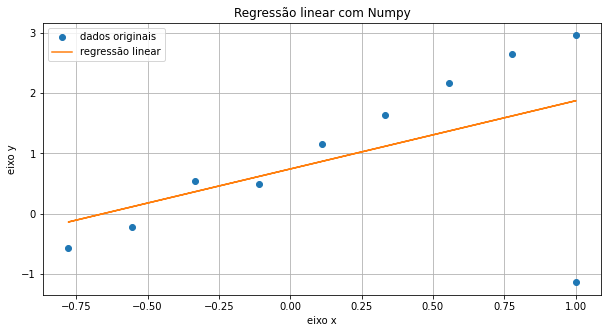

In [15]:
# plot do dataset
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, X.dot(beta), label='regressão linear')
plt.legend()
plt.xlabel("eixo x")
plt.ylabel("eixo y")
plt.title("Regressão linear com Numpy")
plt.grid()
plt.show()